   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

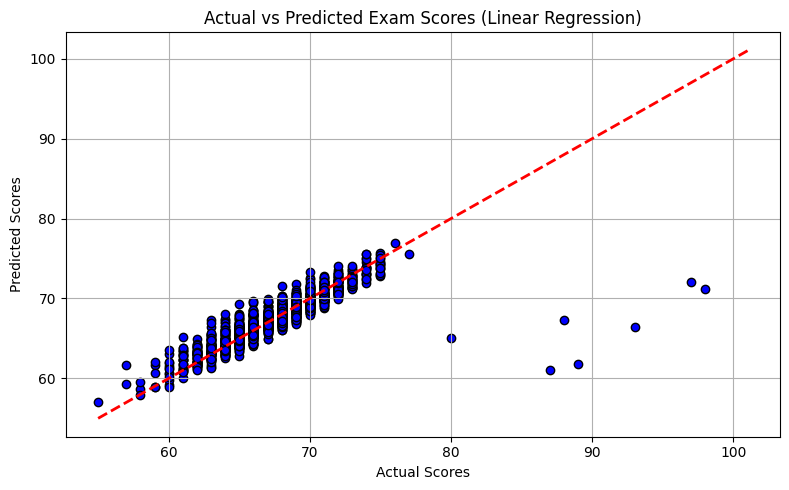

Linear Regression Performance:
R² Score: 0.688619401927732
MSE: 4.401387320454959


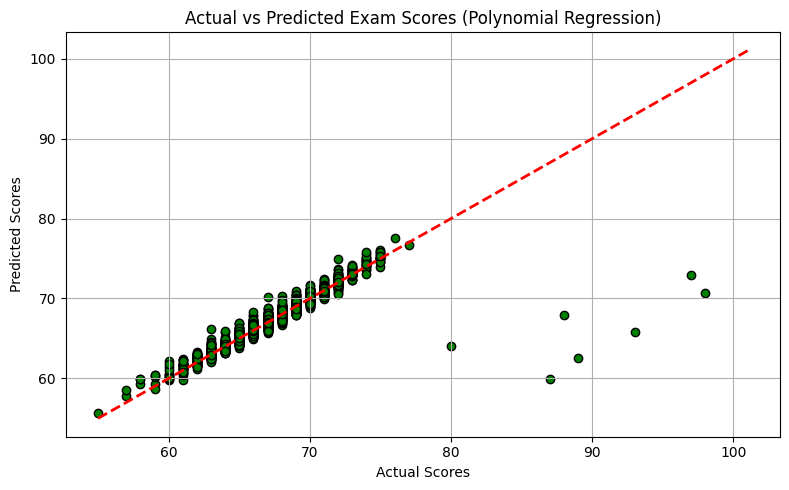

Polynomial Regression Performance:
R² Score: 0.7491118798871059
MSE: 3.546321760424478


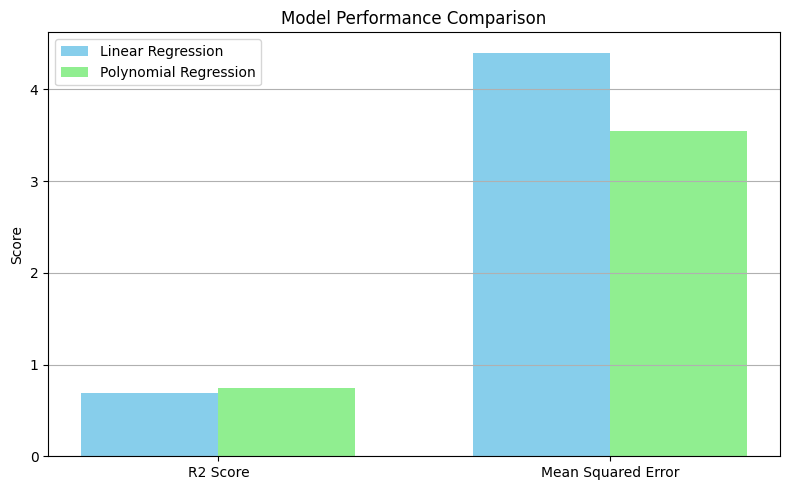

In [4]:
# Import libraries for data manipulation, visualization, and machine learning
import pandas as pd                    # For handling dataframes and reading CSV
import numpy as np                    # For numerical operations
import matplotlib.pyplot as plt       # For plotting graphs
import seaborn as sns                 # For better visualizations
from sklearn.model_selection import train_test_split        # For splitting data into training and testing
from sklearn.linear_model import LinearRegression           # For linear regression model
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder  # For polynomial regression and encoding categorical data
from sklearn.metrics import mean_squared_error, r2_score    # For evaluating model performance

# Load the dataset from a CSV file
df = pd.read_csv('StudentPerformanceFactors.csv')

# Print the first 5 rows of the dataset
print(df.head())

# Check for missing values in each column
print("\nMissing values:\n", df.isnull().sum())

# Identify categorical columns for encoding
categorical_cols = df.select_dtypes(include='object').columns

# Initialize label encoder
le = LabelEncoder()

# Encode all categorical columns using label encoding
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Define the features (X) and the target variable (y)
X = df.drop(['Exam_Score'], axis=1)  # Features: all columns except Exam_Score
y = df['Exam_Score']                 # Target: Exam_Score

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### ------------------------
### Linear Regression Model
### ------------------------

# Initialize the linear regression model
lr_model = LinearRegression()

# Fit the model on training data
lr_model.fit(X_train, y_train)

# Predict exam scores using the testing data
y_pred_lr = lr_model.predict(X_test)

# Visualize the actual vs predicted scores
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_lr, color='blue', edgecolors='k')  # Scatter plot of true vs predicted values
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Reference diagonal line
plt.title("Actual vs Predicted Exam Scores (Linear Regression)")
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluate model performance using R² and MSE
r2_lr = r2_score(y_test, y_pred_lr)                        # R-squared score
mse_lr = mean_squared_error(y_test, y_pred_lr)             # Mean squared error

# Print evaluation results
print("Linear Regression Performance:")
print("R² Score:", r2_lr)
print("MSE:", mse_lr)

### ------------------------
### Polynomial Regression
### ------------------------

# Create polynomial features of degree 2
poly = PolynomialFeatures(degree=2)

# Transform both training and testing features into polynomial form
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize polynomial regression model
poly_model = LinearRegression()

# Train the polynomial regression model on transformed features
poly_model.fit(X_train_poly, y_train)

# Predict exam scores using the polynomial model
y_pred_poly = poly_model.predict(X_test_poly)

# Visualize actual vs predicted scores for polynomial regression
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_poly, color='green', edgecolors='k')  # Scatter plot
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)    # Diagonal reference line
plt.title("Actual vs Predicted Exam Scores (Polynomial Regression)")
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluate polynomial regression performance
r2_poly = r2_score(y_test, y_pred_poly)                  # R-squared score
mse_poly = mean_squared_error(y_test, y_pred_poly)       # Mean squared error

# Print evaluation results
print("Polynomial Regression Performance:")
print("R² Score:", r2_poly)
print("MSE:", mse_poly)

### ------------------------
### Comparison Bar Chart
### ------------------------

# Define evaluation metric names
metrics = ['R2 Score', 'Mean Squared Error']

# Store scores for both models
linear_scores = [r2_lr, mse_lr]
poly_scores = [r2_poly, mse_poly]

# Bar chart X-axis positions
x = range(len(metrics))
width = 0.35  # Width of each bar

# Plot side-by-side bars for comparison
plt.figure(figsize=(8, 5))
plt.bar(x, linear_scores, width, label='Linear Regression', color='skyblue')  # Linear bars
plt.bar([p + width for p in x], poly_scores, width, label='Polynomial Regression', color='lightgreen')  # Polynomial bars

# Set chart labels and titles
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks([p + width / 2 for p in x], metrics)  # Centered x-axis labels
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()